
# Cleaning anomalies in time series per region slug



## Load  libraries

In [ ]:
# %load first_cell.py
%reload_ext autoreload
%autoreload 2
from pathlib import Path
home = str(Path.home())

import sys
sys.path = sys.path + [f'{home}/.conda/envs/norm_env/lib/python37.zip', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/lib-dynload', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/site-packages']
sys.prefix = '/home/soniame/.conda/envs/norm_env'

from paths import RAW_PATH, TREAT_PATH, OUTPUT_PATH, FIGURES_PATH

In [2]:
import pandas as pd

#### Run single

In [ ]:
from src.runners.clean import _run_single 

In [ ]:
daily, weekly = _run_single(region_slug='aguascalientes', 
                            anomaly_vote_minimun_s1=1, 
                            anomaly_vote_minimun_s2=1, 
                            c_metric = 'max', 
                            print_report = False, 
                            print_plot = False)

In [ ]:
#daily[daily.date > '2020-05-19']

In [ ]:
import plotnine as p9
p9.theme_set(p9.theme_linedraw()) # default theme

In [ ]:
daily.head(3)
gg = (p9.ggplot(daily[daily.date > '2021-01-01'], p9.aes(x = 'date', y='tcp')) 
 + p9.geom_line(size= 1, alpha = .7)
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red', size= 1, alpha = .7)
 + p9.theme(figure_size=(6, 3),
            axis_text_x=p9.element_text(size = 7)) )
gg 

In [ ]:
daily.head(3)
gg = (p9.ggplot(daily, p9.aes(x = 'date', y='tcp')) 
 + p9.geom_line(size= 1, alpha = .7)
 + p9.theme(figure_size=(6, 3),
            axis_text_x=p9.element_text(size = 7)) )
gg 

In [ ]:
weekly.head(3)
gg = (p9.ggplot(weekly[weekly.date_min > '2021-01-01'], p9.aes(x = 'date_min', y='tcp')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red')
 + p9.theme(figure_size=(6, 3),
            axis_text_x=p9.element_text(size = 7)) )
gg

In [ ]:
print(daily.date.min())
print(daily.date.max())
print(weekly.week.max())

#### Run by batch

Running by batch

In [21]:
from src.runners.clean import _run_batch 

../src/utils.py:159: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [31]:
_run_batch(athena_path = "/home/soniame/shared/spd-sdv-omitnik-waze/corona", 
          c_metric = 'max',
          f_metric = 20,
          version = 'dev')

../src/utils.py:159: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
2021-07-05 18:30:26.979 | INFO     | src.runners.clean:_run_batch:959 - TO DO regions  81
2021-07-05 18:30:26.980 | INFO     | src.runners.clean:_run_single:884 - ... here we go aguascalientes...

2021-07-05 18:30:26.981 | DEBUG    | src.runners.clean:_reading_data:687 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('aguascalientes')
         and date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') >= date('2020-03-09')
        
2021-07-05 18:30:29.578 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.0273899198125596
2021-07-05 18:30:29.604 | DEBUG  

2021-07-05 18:30:33.106 | DEBUG    | src.runners.clean:_get_max_date:700 - last update 2021-05-19
2021-07-05 18:30:33.301 | DEBUG    | src.runners.clean:_write_missing:717 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_aguascalientes.pdf
2021-07-05 18:30:34.840 | INFO     | src.runners.clean:_run_single:939 - ... aguascalientes done ...

2021-07-05 18:30:34.842 | INFO     | src.runners.clean:_run_single:884 - ... here we go arequipa...

2021-07-05 18:30:34.845 | DEBUG    | src.runners.clean:_reading_data:687 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('arequipa')
         and date_pars

2021-07-05 18:30:37.517 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:30:37.565 | INFO     | src.runners.clean:_run_step:833 - Output variable S2_shift
2021-07-05 18:30:37.566 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:30:37.567 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:30:37.569 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:30:37.576 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:30:37.576 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 27.41559566935559
2021-07-05 18:30:38.204 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:30:38.206 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:30:38.206 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-07-05 18:30:44.369 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:30:44.369 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-07-05 18:30:44.375 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.76668667025904
2021-07-05 18:30:44.376 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.76668667025904
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:30:44.476 | DEBUG    | src.runners.clean:_find_anomal

2021-07-05 18:30:51.220 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:30:51.220 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:30:51.221 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:30:51.223 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:30:51.229 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:30:51.230 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 13.502613770130424
2021-07-05 18:30:51.865 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:30:51.866 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:30:51.867 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 18:30:52.134 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at 

2021-07-05 18:30:59.020 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-03 00:00:00'), Timestamp('2020-04-10 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2020-04-24 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-06-10 00:00:00'), Timestamp('2020-06-12 00:00:00'), Timestamp('2020-08-07 00:00:00'), Timestamp('2020-09-07 00:00:00'), Timestamp('2020-09-14 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-09 00:00:00'), Timestamp('2020-12-10 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-02-05 00:00:00'), Timestamp('2021-02-08 00:00:00'), Timestamp('2021-02-15 00:00:00'), Timestamp('2021-02-18 00:00:00'), Timestamp('2021-02-22 00:00:00'), Timestamp('2021-02-23 00:00:00'), Timestamp('2021-02-26 00:00:00'), Time

2021-07-05 18:31:06.015 | INFO     | src.runners.clean:_run_step:814 - Target variable: observed 

2021-07-05 18:31:06.016 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:31:06.017 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 18:31:06.024 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.7885534354346917
2021-07-05 18:31:06.025 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.7885534354346917
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

2021-07-05 18:31:12.227 | INFO     | src.runners.clean:_run_single:884 - ... here we go brasilia...

2021-07-05 18:31:12.228 | DEBUG    | src.runners.clean:_reading_data:687 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('brasilia')
         and date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') >= date('2020-03-09')
        
2021-07-05 18:31:15.287 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.045577611833902
2021-07-05 18:31:15.312 | DEBUG    | src.runners.clean:_c_param:348 - C max: 20.91155223667804
2021-07-05 18:31:15.316 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:31:15.316 | INFO     | src.runners.clean:_run_step:814 - Target variable: observed 

2021-07-05 18:31:15.317 | DEBUG    

2021-07-05 18:31:16.586 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:31:16.587 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 20.91155223667804
2021-07-05 18:31:17.220 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:31:17.221 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:31:17.223 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 18:31:17.459 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:31:17.462 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:31:17.463 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

2021-07-05 18:31:24.619 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-17 00:00:00'), Timestamp('2020-11-17 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-11-23 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-16 00:00:00'), Timestamp('2021-01-17 00:00:00'), Timestamp('2021-01-18 00:00:00'), Timestamp('2021-01-24 00:00:00'), Timestamp('2021-02-07 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-18 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-28 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-04 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-25 00:00:00'), Timestamp('2021-04-27 00:00:00'), Timestamp('2021-05-02 00:00:00'), Timestamp('2021-05-05 00:00:00'), Timestamp('2021-05-06 00:00:00'), Timestamp('2021-05-13 00:00:00'), Timestamp('2021-05-16 00:00:00'), Timestamp('2021-05-23 00:00:00'), Time

2021-07-05 18:31:33.818 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:31:33.821 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:31:33.861 | DEBUG    | src.runners.clean:_run_step:866 - ... step done ...
2021-07-05 18:31:33.863 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:31:33.865 | INFO     | src.runners.clean:_run_step:814 - Target variable: S1_shift 

2021-07-05 18:31:33.865 | DEBUG    | src

2021-07-05 18:31:40.686 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:31:40.735 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:31:40.736 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:31:40.736 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:31:40.738 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:31:40.744 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:31:40.745 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 29.175160272174786
2021-07-05 18:31:41.379 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:31:41.380 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:31:41.381 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:31:49.665 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-06-10 00:00:00'), Timestamp('2020-06-12 00:00:00'), Timestamp('2020-06-19 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-09-14 00:00:00'), Timestamp('2020-10-11 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2020-10-30 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-11 00:00:00'), Timestamp('2020-11-18 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-11-27 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-07 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-17 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-28 00:00:00'), Timestamp('2021-04-28 00:00:00'), Timestamp('2021-05-07 00:00:00'), Time

2021-07-05 18:31:57.381 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.5510305787633392
2021-07-05 18:31:57.399 | DEBUG    | src.runners.clean:_c_param:348 - C max: 31.020611575266784
2021-07-05 18:31:57.402 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:31:57.403 | INFO     | src.runners.clean:_run_step:814 - Target variable: observed 

2021-07-05 18:31:57.403 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:31:57.405 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 18:31:57.410 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5510305787633392
2021-07-05 18:31:57.413 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5510305787633392
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

2021-07-05 18:31:59.535 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:31:59.535 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:31:59.576 | DEBUG    | src.runners.clean:_run_step:866 - ... step done ...
2021-07-05 18:32:01.846 | DEBUG    | src.runners.clean:_get_max_date:700 - last update 2021-05-19
2021-07-05 18:32:02.045 | DEBUG    | src.runners.clean:_write_missing:717 - ... writing anomalies file ...
/home/soniame/.conda/env

2021-07-05 18:32:07.333 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:32:07.382 | INFO     | src.runners.clean:_run_step:833 - Output variable S2_shift
2021-07-05 18:32:07.382 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:32:07.383 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:32:07.385 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:32:07.390 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:32:07.391 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 32.378308026308716
2021-07-05 18:32:08.021 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:32:08.023 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:32:08.023 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:32:15.255 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-10 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-09-01 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-04 00:00:00'), Timestamp('2021-02-13 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-28 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-05-16 00:00:00'), Timestamp('2021-06-04 00:00:00'), Timestamp('2021-06-05 00:00:00'), Timestamp('2021-06-06 00:00:00'), Timestamp('2021-06-18 00:00:00'), Timestamp('2021-06-20 00:00:00'), Timestamp('2021-06-25 00:00:00'), Timestamp('2021-06-27 00:00:00')]
2021-07-05 18:32:15.258 | DEBUG    | s

2021-07-05 18:32:23.628 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:32:23.629 | INFO     | src.runners.clean:_run_step:814 - Target variable: S1_shift 

2021-07-05 18:32:23.630 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:32:23.630 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-07-05 18:32:23.636 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.9579304881178845
2021-07-05 18:32:23.637 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.9579304881178845
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

2021-07-05 18:32:31.050 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:32:31.051 | INFO     | src.runners.clean:_run_step:814 - Target variable: S1_shift 

2021-07-05 18:32:31.052 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:32:31.052 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-07-05 18:32:31.058 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 18:32:31.060 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

2021-07-05 18:32:38.861 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:32:38.862 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-07-05 18:32:38.868 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 3
2021-07-05 18:32:38.869 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 3
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:32:38.970 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies 

2021-07-05 18:32:47.526 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:32:47.528 | INFO     | src.runners.clean:_run_step:814 - Target variable: S1_shift 

2021-07-05 18:32:47.529 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:32:47.529 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-07-05 18:32:47.534 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.691574492443756
2021-07-05 18:32:47.534 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.691574492443756
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

2021-07-05 18:32:55.288 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:32:55.291 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:32:55.292 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:32:55.332 | DEBUG    | src.runners.clean:_run_step:866 - ... step done ...
2021-07-05 18:32:55.334 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:32:55.335 | INFO     | sr

2021-07-05 18:33:02.168 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:33:02.219 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:33:02.220 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:33:02.221 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:33:02.223 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:33:02.229 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:33:02.230 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 26.702904631432766
2021-07-05 18:33:02.866 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:33:02.867 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:33:02.868 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:33:08.816 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:33:08.817 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 18:33:08.823 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 2.0178491790094
2021-07-05 18:33:08.824 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 2.0178491790094
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:33:08.928 | DEBUG    | src.runners.clean:_find_anomalie

2021-07-05 18:33:13.920 | INFO     | src.runners.clean:_run_single:939 - ... country_ecuador done ...

2021-07-05 18:33:13.922 | INFO     | src.runners.clean:_run_single:884 - ... here we go country_el_salvador...

2021-07-05 18:33:13.925 | DEBUG    | src.runners.clean:_reading_data:687 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('country_el_salvador')
         and date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') >= date('2020-03-09')
        
2021-07-05 18:33:15.363 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.983635178740892
2021-07-05 18:33:15.384 | DEBUG    | src.runners.clean:_c_param:348 - C max: 39.67270357481784
2021-07-05 18:33:15.387 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-0

2021-07-05 18:33:17.519 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:33:17.522 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:33:17.523 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:33:17.563 | DEBUG    | src.runners.clean:_run_step:866 - ... step done ...
2021-07-05 18:33:19.850 | DEBUG    | src.runners.clean:_get_max_date:700 - last update 2021-05-19
2021-07-05 18:33:20.047 | DEBUG

2021-07-05 18:33:24.221 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:33:24.222 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:33:24.228 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:33:24.229 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 26.995278658076053
2021-07-05 18:33:24.856 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:33:24.857 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:33:24.858 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 18:33:25.128 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:33:25.132 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:33:25.133 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src

2021-07-05 18:33:30.761 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 60.0
2021-07-05 18:33:31.389 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:33:31.390 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:33:31.394 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 18:33:31.629 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:33:31.632 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:33:31.634 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set 

2021-07-05 18:33:39.051 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:33:39.054 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 18:33:39.289 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:33:39.292 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:33:39.293 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05

2021-07-05 18:33:45.673 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 21.389353538231347
2021-07-05 18:33:46.141 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:33:46.142 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:33:46.143 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 18:33:46.306 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:33:46.309 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:33:46.309 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is try

2021-07-05 18:33:52.503 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 18:33:52.740 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:33:52.743 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:33:52.744 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:33:52.784 | DEBUG    | src.runners.clean:_run_step:866 - ... step done ...
2021-07-05 18:33:54.014 | DEBUG

2021-07-05 18:33:59.298 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:33:59.347 | INFO     | src.runners.clean:_run_step:833 - Output variable S2_shift
2021-07-05 18:33:59.347 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:33:59.348 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:33:59.350 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:33:59.355 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:33:59.356 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 33.404011395207434
2021-07-05 18:33:59.983 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:33:59.985 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:33:59.985 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:34:07.027 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.6675761482788345
2021-07-05 18:34:07.034 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.6675761482788345
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:34:07.134 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 22

2021-07-05 18:34:07.135 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-11-27 00:00:00'), Timestamp('2020-12-11 00:00:00'), Timestamp('2021-0

2021-07-05 18:34:14.541 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:34:14.541 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:34:14.582 | DEBUG    | src.runners.clean:_run_step:866 - ... step done ...
2021-07-05 18:34:14.584 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:34:14.585 | INFO     | src.runners.clean:_run_step:814 - Target variable: S1_shift 

2021-07-05 18:34:14.585 | DEBUG    | src

2021-07-05 18:34:21.192 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:34:21.241 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:34:21.242 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:34:21.243 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:34:21.245 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:34:21.252 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:34:21.253 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 21.38017152314131
2021-07-05 18:34:21.884 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:34:21.885 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:34:21.885 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-07-05 18:34:29.139 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2021-06-04 00:00:00')]
2021-07-05 18:34:29.142 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:34:29.190 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:34:29.191 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:34:29.191 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:34:29.193 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:34:29.199 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:34

2021-07-05 18:34:36.695 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:34:36.745 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:34:36.745 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:34:36.748 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:34:36.750 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:34:36.756 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:34:36.757 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 41.545052731158485
2021-07-05 18:34:37.388 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:34:37.389 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:34:37.389 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:34:43.279 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:34:43.327 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:34:43.328 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:34:43.328 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:34:43.331 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:34:43.336 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:34:43.337 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 62.029820535966365
2021-07-05 18:34:43.966 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:34:43.967 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:34:43.968 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:34:51.091 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:34:51.141 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:34:51.142 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:34:51.142 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:34:51.144 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:34:51.152 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:34:51.156 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 11.060324475836973
2021-07-05 18:34:51.789 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:34:51.790 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:34:51.790 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:34:58.702 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-06-12 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-09-07 00:00:00'), Timestamp('2020-09-13 00:00:00'), Timestamp('2020-10-04 00:00:00'), Timestamp('2020-10-11 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2020-10-25 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-08 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-24 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-07 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-28 00:00:00'), Timestamp('2021-05-02 00:00:00'), Timestamp('2021-05-07 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-05-10 00:00:00'), Time

2021-07-05 18:35:07.497 | DEBUG    | src.runners.clean:_c_param:348 - C max: 13.772805639163415
2021-07-05 18:35:07.500 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:35:07.501 | INFO     | src.runners.clean:_run_step:814 - Target variable: observed 

2021-07-05 18:35:07.501 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:35:07.503 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 18:35:07.508 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 18:35:07.508 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is try

2021-07-05 18:35:09.399 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:35:09.399 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 18:35:09.637 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:35:09.641 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:35:09.641 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05

2021-07-05 18:35:16.690 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:35:16.738 | INFO     | src.runners.clean:_run_step:833 - Output variable S2_shift
2021-07-05 18:35:16.739 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:35:16.740 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:35:16.742 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:35:16.748 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:35:16.749 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 26.83803334115612
2021-07-05 18:35:17.379 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:35:17.380 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:35:17.382 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-07-05 18:35:25.851 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-08 00:00:00'), Timestamp('2020-05-29 00:00:00'), Timestamp('2020-05-30 00:00:00'), Timestamp('2020-05-31 00:00:00'), Timestamp('2020-06-07 00:00:00'), Timestamp('2020-09-20 00:00:00'), Timestamp('2020-11-08 00:00:00'), Timestamp('2020-11-18 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-11-29 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-24 00:00:00'), Timestamp('2021-02-07 00:00:00'), Timestamp('2021-02-21 00:00:00'), Timestamp('2021-02-28 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-04-04 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-18 00:00:00'), Timestamp('2021-04-25 00:00:00'), Timestamp('2021-05-02 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-05-10 00:00:00'), Timestamp('2021-05-16 00:00:00'), Time

2021-07-05 18:35:34.550 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:35:34.553 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:35:34.554 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:35:34.594 | DEBUG    | src.runners.clean:_run_step:866 - ... step done ...
2021-07-05 18:35:34.595 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:35:34.598 | INFO     | sr

2021-07-05 18:35:41.181 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:35:41.230 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:35:41.231 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:35:41.231 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:35:41.233 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:35:41.239 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:35:41.240 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 16.658039122341407
2021-07-05 18:35:41.875 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:35:41.876 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:35:41.878 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:35:49.954 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:35:50.003 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:35:50.004 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:35:50.004 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:35:50.007 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:35:50.013 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:35:50.013 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 29.351468451692444
2021-07-05 18:35:50.647 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:35:50.648 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:35:50.650 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:35:57.754 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:35:57.803 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:35:57.804 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:35:57.804 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:35:57.806 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:35:57.812 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:35:57.813 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 13.424126289442615
2021-07-05 18:35:58.603 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:35:58.607 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:35:58.608 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:36:06.075 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:36:06.123 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:36:06.124 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:36:06.125 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:36:06.127 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:36:06.133 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:36:06.133 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 26.584728572510503
2021-07-05 18:36:06.764 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:36:06.765 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:36:06.767 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:36:13.519 | DEBUG    | src.runners.clean:_c_param:348 - C max: 0.6694820447662065
2021-07-05 18:36:13.541 | DEBUG    | src.runners.clean:_c_param:348 - C max: 13.389640895324131
2021-07-05 18:36:13.545 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:36:13.545 | INFO     | src.runners.clean:_run_step:814 - Target variable: observed 

2021-07-05 18:36:13.546 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:36:13.547 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 18:36:13.553 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 18:36:13.554 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

2021-07-05 18:36:15.684 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:36:15.687 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:36:15.688 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:36:15.728 | DEBUG    | src.runners.clean:_run_step:866 - ... step done ...
2021-07-05 18:36:16.930 | DEBUG    | src.runners.clean:_get_max_date:700 - last update 2021-05-19
2021-07-05 18:36:17.125 | DEBUG

2021-07-05 18:36:22.288 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:36:22.336 | INFO     | src.runners.clean:_run_step:833 - Output variable S2_shift
2021-07-05 18:36:22.337 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:36:22.338 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:36:22.340 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:36:22.346 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:36:22.347 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 46.12504496747823
2021-07-05 18:36:22.977 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:36:22.978 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:36:22.979 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-07-05 18:36:29.948 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:36:29.949 | INFO     | src.runners.clean:_run_step:814 - Target variable: S1_shift 

2021-07-05 18:36:29.950 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:36:29.951 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-07-05 18:36:29.956 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 18:36:29.957 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

2021-07-05 18:36:36.997 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:36:37.047 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:36:37.047 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:36:37.048 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:36:37.050 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:36:37.057 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:36:37.057 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 21.123082849724746
2021-07-05 18:36:37.695 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:36:37.696 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:36:37.697 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:36:44.695 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-06-02 00:00:00'), Timestamp('2020-06-04 00:00:00'), Timestamp('2020-06-09 00:00:00'), Timestamp('2020-07-10 00:00:00'), Timestamp('2020-09-14 00:00:00'), Timestamp('2020-10-03 00:00:00'), Timestamp('2020-10-30 00:00:00'), Timestamp('2021-02-19 00:00:00'), Timestamp('2021-05-21 00:00:00'), Timestamp('2021-06-03 00:00:00'), Timestamp('2021-06-12 00:00:00'), Timestamp('2021-06-17 00:00:00'), Timestamp('2021-06-18 00:00:00'), Timestamp('2021-06-24 00:00:00')]
2021-07-05 18:36:44.697 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:36:44.746 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:36:44.747 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:36:44.747 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:36:44.749 | DEBUG    | src.runners.clean:_vali

2021-07-05 18:36:53.968 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-10 00:00:00'), Timestamp('2020-04-11 00:00:00'), Timestamp('2020-07-15 00:00:00'), Timestamp('2020-09-16 00:00:00'), Timestamp('2020-09-23 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-14 00:00:00'), Timestamp('2020-11-23 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-03-15 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-22 00:00:00'), Timestamp('2021-03-28 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-04 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-10 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-18 00:00:00'), Timestamp('2021-04-29 00:00:00'), Timestamp('2021-04-30 00:00:00'), Timestamp('2021-05-08 00:00:00'), Time

2021-07-05 18:37:02.947 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.0541138630388942
2021-07-05 18:37:02.964 | DEBUG    | src.runners.clean:_c_param:348 - C max: 21.082277260777886
2021-07-05 18:37:02.968 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:37:02.969 | INFO     | src.runners.clean:_run_step:814 - Target variable: observed 

2021-07-05 18:37:02.969 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:37:02.971 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 18:37:02.976 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 18:37:02.977 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

2021-07-05 18:37:08.052 | INFO     | src.runners.clean:_run_single:939 - ... monterrey done ...

2021-07-05 18:37:08.053 | INFO     | src.runners.clean:_run_single:884 - ... here we go montevideo...

2021-07-05 18:37:08.056 | DEBUG    | src.runners.clean:_reading_data:687 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('montevideo')
         and date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') >= date('2020-03-09')
        
2021-07-05 18:37:10.705 | DEBUG    | src.runners.clean:_c_param:348 - C max: 0.8200260736553959
2021-07-05 18:37:10.724 | DEBUG    | src.runners.clean:_c_param:348 - C max: 16.40052147310792
2021-07-05 18:37:10.727 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:37:10.728 | INFO  

2021-07-05 18:37:12.856 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:37:12.859 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:37:12.860 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:37:12.900 | DEBUG    | src.runners.clean:_run_step:866 - ... step done ...
2021-07-05 18:37:14.151 | DEBUG    | src.runners.clean:_get_max_date:700 - last update 2021-05-19
2021-07-05 18:37:14.345 | DEBUG

2021-07-05 18:37:20.049 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:37:20.098 | INFO     | src.runners.clean:_run_step:833 - Output variable S2_shift
2021-07-05 18:37:20.098 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:37:20.099 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:37:20.101 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:37:20.107 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:37:20.107 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 21.76088451518861
2021-07-05 18:37:20.726 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:37:20.727 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:37:20.730 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-07-05 18:37:27.493 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:37:27.494 | INFO     | src.runners.clean:_run_step:814 - Target variable: S1_shift 

2021-07-05 18:37:27.494 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:37:27.495 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-07-05 18:37:27.501 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 18:37:27.501 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

2021-07-05 18:37:34.296 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:37:34.345 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:37:34.345 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:37:34.346 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:37:34.348 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:37:34.354 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:37:34.355 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 27.983204449359963
2021-07-05 18:37:34.987 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:37:34.988 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:37:34.989 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:37:42.259 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-02 00:00:00'), Timestamp('2020-04-03 00:00:00'), Timestamp('2020-04-10 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-06-10 00:00:00'), Timestamp('2020-06-13 00:00:00'), Timestamp('2020-06-17 00:00:00'), Timestamp('2020-06-19 00:00:00'), Timestamp('2020-06-20 00:00:00'), Timestamp('2020-07-09 00:00:00'), Timestamp('2020-07-13 00:00:00'), Timestamp('2020-09-07 00:00:00'), Timestamp('2020-09-13 00:00:00'), Timestamp('2020-09-14 00:00:00'), Timestamp('2020-10-11 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-15 00:00:00'), Timestamp('2021-02-16 00:00:00'), Timestamp('2021-04-01 00:00:00'), Time

2021-07-05 18:37:49.888 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.1453348435521231
2021-07-05 18:37:49.907 | DEBUG    | src.runners.clean:_c_param:348 - C max: 22.906696871042463
2021-07-05 18:37:49.910 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:37:49.911 | INFO     | src.runners.clean:_run_step:814 - Target variable: observed 

2021-07-05 18:37:49.912 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:37:49.913 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 18:37:49.920 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 18:37:49.920 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

2021-07-05 18:37:55.673 | INFO     | src.runners.clean:_run_single:884 - ... here we go queretaro...

2021-07-05 18:37:55.676 | DEBUG    | src.runners.clean:_reading_data:687 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('queretaro')
         and date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') >= date('2020-03-09')
        
2021-07-05 18:37:58.204 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.0217022006577623
2021-07-05 18:37:58.225 | DEBUG    | src.runners.clean:_c_param:348 - C max: 20.434044013155244
2021-07-05 18:37:58.228 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:37:58.229 | INFO     | src.runners.clean:_run_step:814 - Target variable: observed 

2021-07-05 18:37:58.230 | DEBUG

2021-07-05 18:38:01.683 | DEBUG    | src.runners.clean:_get_max_date:700 - last update 2021-05-19
2021-07-05 18:38:01.879 | DEBUG    | src.runners.clean:_write_missing:717 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_queretaro.pdf
2021-07-05 18:38:03.346 | INFO     | src.runners.clean:_run_single:939 - ... queretaro done ...

2021-07-05 18:38:03.347 | INFO     | src.runners.clean:_run_single:884 - ... here we go quito...

2021-07-05 18:38:03.350 | DEBUG    | src.runners.clean:_reading_data:687 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('quito')
         and date_parse(concat(cast(ye

2021-07-05 18:38:07.375 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:38:07.423 | INFO     | src.runners.clean:_run_step:833 - Output variable S2_shift
2021-07-05 18:38:07.424 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:38:07.425 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:38:07.427 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:38:07.434 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:38:07.434 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 28.04191290400069
2021-07-05 18:38:08.062 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:38:08.063 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:38:08.066 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-07-05 18:38:15.097 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-03 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2020-05-22 00:00:00'), Timestamp('2020-06-12 00:00:00'), Timestamp('2020-06-15 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-10-26 00:00:00'), Timestamp('2020-11-15 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-12-09 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-02-05 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-15 00:00:00'), Timestamp('2021-02-17 00:00:00'), Timestamp('2021-03-06 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-19 00:00:00'), Timestamp('2021-03-23 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-18 00:00:00'), Timestamp('2021-05-05 00:00:00'), Timestamp('2021-05-07 00:00:00'), Timestamp('2021-05-14 00:00:00'), Timestamp('2021-05-17 00:00:00'), Timestamp('2021-06-13 00:00:00'), Timestamp('2021-06-27 00:00:00')]
2021

2021-07-05 18:38:23.251 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:38:23.253 | INFO     | src.runners.clean:_run_step:814 - Target variable: S1_shift 

2021-07-05 18:38:23.254 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:38:23.254 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-07-05 18:38:23.260 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 18:38:23.260 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

2021-07-05 18:38:29.891 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:38:29.941 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:38:29.942 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:38:29.943 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:38:29.945 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:38:29.952 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:38:29.953 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 32.601276485710144
2021-07-05 18:38:30.585 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:38:30.586 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:38:30.587 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:38:37.782 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-03 00:00:00'), Timestamp('2020-04-10 00:00:00'), Timestamp('2020-04-21 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-08-06 00:00:00'), Timestamp('2020-09-06 00:00:00'), Timestamp('2020-09-07 00:00:00'), Timestamp('2020-09-13 00:00:00'), Timestamp('2020-09-14 00:00:00'), Timestamp('2020-10-11 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-21 00:00:00'), Timestamp('2021-04-25 00:00:00'), Timestamp('2021-04-28 00:00:00'), Timestamp('2021-04-30 00:00:00'), Timestamp('2021-06-02 00:00:00'), Timestamp('2021-06-03 00:00:00'), Time

2021-07-05 18:38:45.392 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.4722106991438355
2021-07-05 18:38:45.409 | DEBUG    | src.runners.clean:_c_param:348 - C max: 29.44421398287671
2021-07-05 18:38:45.413 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:38:45.414 | INFO     | src.runners.clean:_run_step:814 - Target variable: observed 

2021-07-05 18:38:45.415 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:38:45.418 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 18:38:45.422 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 18:38:45.423 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

2021-07-05 18:38:47.545 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:38:47.549 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:38:47.550 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:38:47.589 | DEBUG    | src.runners.clean:_run_step:866 - ... step done ...
2021-07-05 18:38:49.834 | DEBUG    | src.runners.clean:_get_max_date:700 - last update 2021-05-19
2021-07-05 18:38:50.031 | DEBUG

2021-07-05 18:38:55.328 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 33.10849709119505
2021-07-05 18:38:55.956 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:38:55.957 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:38:55.960 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 18:38:56.196 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:38:56.199 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:38:56.200 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is tryi

2021-07-05 18:39:03.070 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-07-05 18:39:03.075 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 18:39:03.075 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:39:03.176 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 55

2021-07-05 18:39:03.177 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp(

2021-07-05 18:39:09.527 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:39:09.575 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:39:09.576 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:39:09.577 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:39:09.579 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:39:09.585 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:39:09.585 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 24.949649460226606
2021-07-05 18:39:10.217 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:39:10.218 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:39:10.219 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:39:16.043 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-12-02 00:00:00'), Timestamp('2021-03-29 00:00:00'), Timestamp('2021-03-30 00:00:00'), Timestamp('2021-04-02 00:00:00')]
2021-07-05 18:39:16.046 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:39:16.094 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:39:16.095 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:39:16.095 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:39:16.097 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:39:16.103 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:39:16.104 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 117.02365934151632
2021-07-05 18:39:16.733 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total co

2021-07-05 18:39:25.508 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:39:25.557 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:39:25.558 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:39:25.559 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:39:25.561 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:39:25.568 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:39:25.568 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 14.477596501129605
2021-07-05 18:39:26.204 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:39:26.205 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:39:26.205 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:39:33.250 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-02 00:00:00'), Timestamp('2020-08-09 00:00:00'), Timestamp('2020-08-16 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-09-06 00:00:00'), Timestamp('2020-09-13 00:00:00'), Timestamp('2020-09-20 00:00:00'), Timestamp('2020-09-24 00:00:00'), Timestamp('2020-09-27 00:00:00'), Timestamp('2020-10-01 00:00:00'), Timestamp('2020-10-04 00:00:00'), Timestamp('2020-10-11 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2020-10-25 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-11-08 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-15 00:00:00'), Timestamp('2020-11-16 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-11-29 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-16 00:00:00'), Time

2021-07-05 18:39:34.345 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:39:34.394 | INFO     | src.runners.clean:_run_step:833 - Output variable S2_shift
2021-07-05 18:39:34.395 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:39:34.395 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:39:34.397 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:39:34.404 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:39:34.404 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 29.886730761608842
2021-07-05 18:39:35.035 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:39:35.036 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:39:35.038 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:39:42.180 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:39:42.181 | INFO     | src.runners.clean:_run_step:814 - Target variable: S1_shift 

2021-07-05 18:39:42.183 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:39:42.184 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-07-05 18:39:42.190 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 18:39:42.191 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

2021-07-05 18:39:49.088 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:39:49.088 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:39:49.089 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:39:49.091 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:39:49.098 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:39:49.098 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 35.792051153089666
2021-07-05 18:39:49.725 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:39:49.727 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:39:49.727 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 18:39:49.966 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at 

2021-07-05 18:39:55.774 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:39:55.824 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:39:55.824 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:39:55.825 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:39:55.827 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:39:55.833 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:39:55.833 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 30.447336075425856
2021-07-05 18:39:56.463 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:39:56.464 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:39:56.465 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:40:03.499 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:40:03.550 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:40:03.551 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:40:03.552 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:40:03.554 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:40:03.561 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:40:03.561 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 21.341663578536153
2021-07-05 18:40:04.206 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:40:04.207 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:40:04.210 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-07-05 18:40:12.909 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-03 00:00:00'), Timestamp('2020-04-10 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-05-15 00:00:00'), Timestamp('2020-06-10 00:00:00'), Timestamp('2020-06-12 00:00:00'), Timestamp('2020-09-07 00:00:00'), Timestamp('2020-09-13 00:00:00'), Timestamp('2020-09-14 00:00:00'), Timestamp('2020-09-20 00:00:00'), Timestamp('2020-09-27 00:00:00'), Timestamp('2020-10-04 00:00:00'), Timestamp('2020-10-09 00:00:00'), Timestamp('2020-10-11 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2020-10-25 00:00:00'), Timestamp('2020-10-30 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-11-27 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-06 00:00:00'), Time

2021-07-05 18:40:17.906 | INFO     | src.runners.clean:_run_single:884 - ... here we go sorocaba...

2021-07-05 18:40:17.909 | DEBUG    | src.runners.clean:_reading_data:687 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.dev_daily_daily_index
        where region_slug in ('sorocaba')
         and date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') >= date('2020-03-09')
        
2021-07-05 18:40:20.406 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.3518559706673363
2021-07-05 18:40:20.426 | DEBUG    | src.runners.clean:_c_param:348 - C max: 27.037119413346726
2021-07-05 18:40:20.430 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:40:20.430 | INFO     | src.runners.clean:_run_step:814 - Target variable: observed 

2021-07-05 18:40:20.432 | DEBUG  

2021-07-05 18:40:21.690 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 27.037119413346726
2021-07-05 18:40:22.315 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:40:22.315 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:40:22.316 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 18:40:22.550 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-07-05 18:40:22.554 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-07-05 18:40:22.554 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is try

2021-07-05 18:40:28.278 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-07-05 18:40:28.284 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 18:40:28.285 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:40:28.385 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 50

2021-07-05 18:40:28.386 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp(

2021-07-05 18:40:34.067 | INFO     | src.runners.clean:_run_step:833 - Output variable S1_shift
2021-07-05 18:40:34.068 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-07-05 18:40:34.069 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-07-05 18:40:34.071 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-07-05 18:40:34.079 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-07-05 18:40:34.080 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 19.443173209788874
2021-07-05 18:40:34.714 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-07-05 18:40:34.715 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-07-05 18:40:34.716 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-07-05 18:40:34.953 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at 

2021-07-05 18:40:41.992 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-20 00:00:00'), Timestamp('2020-11-14 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-10 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-15 00:00:00'), Timestamp('2021-04-18 00:00:00'), Timestamp('2021-04-22 00:00:00'), Timestamp('2021-05-08 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-05-15 00:00:00'), Timestamp('2021-06-02 00:00:00'), Timestamp('2021-06-03 00:00:00'), Timestamp('2021-06-04 00:00:00'), Timestamp('2021-06-06 00:00:00'), Timestamp('2021-06-18 00:00:00'), Timestamp('2021-06-20 00:00:00'), Timestamp('2021-06-27 00:00:00')]
2021-07-05 18:40:41.994 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-07-05 18:40:42.044 | INFO     | src.runners.clean:_run_step:833

../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-07-05 18:40:49.553 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 36

2021-07-05 18:40:49.554 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-07-10 00:00:00'), Timestamp('2020-07-11 00:00:00'), Timestamp('2020-07-14 00:00:00'), Timestamp('2020-07-15 00:00:00'), Timestamp('2020-07-16 00:00:00'), Timestamp('2020-07-23 00:00:00'), Timestamp('2020-07-25 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-07-28 

2021-07-05 18:40:57.289 | DEBUG    | src.runners.clean:_c_param:348 - C max: 0.8880699427405386
2021-07-05 18:40:57.310 | DEBUG    | src.runners.clean:_c_param:348 - C max: 17.76139885481077
2021-07-05 18:40:57.314 | DEBUG    | src.runners.clean:_run_step:813 - ... step start ...
2021-07-05 18:40:57.314 | INFO     | src.runners.clean:_run_step:814 - Target variable: observed 

2021-07-05 18:40:57.316 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-07-05 18:40:57.318 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-07-05 18:40:57.323 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-07-05 18:40:57.323 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

2021-07-05 18:41:01.758 | DEBUG    | src.runners.clean:_get_max_date:700 - last update 2021-05-19
2021-07-05 18:41:01.954 | DEBUG    | src.runners.clean:_write_missing:717 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_vitoria.pdf
2021-07-05 18:41:04.394 | INFO     | src.runners.clean:_run_single:939 - ... vitoria done ...



## Results Batch

In [5]:
import pandas as pd
from siuba import *
import datetime

In [6]:
cm = str(datetime.datetime.today().strftime("%Y%m%d%H%m"))
cm

'202107051707'

### Daily

#### Experiments of parameters

Experiments with different parameters to test level shift and outliers. Each experiment represents a different pipeline run varying parameters. Each experiment is saved at s3 

In [ ]:
df_list = list()
for k in range(7):
    file = ['ls1', 'ls4', 'ls10', 'ls15', 'ls20', 'ls100', 'lsmix'][k]
    print(file)
    metric = ['', '_ls_4X', '_ls_10X', '_ls_15X', '_ls_20X', '_ls_OFF', '_ls_MIX'][k]
    
    df = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_max_{file}.csv")
    df = df[['date', 'region_slug', 'tci_observed', 'tcp_observed', 'tci_clean', 'tcp_clean']] \
        .rename(columns = {'tci_clean':f'tci_cleaned{metric}', 
                           'tcp_clean':f'tcp_cleaned{metric}'}) 
    print(df.shape)
    df_list.append(df)
    
from functools import reduce
df_union = reduce(lambda x, y: pd.merge(x, y, on = ['date', 'region_slug', 'tci_observed', 'tcp_observed']), df_list)
print(df_union.shape)
print(df_union.date.max())
df_union.head(2)    

#### Export to csv

In [ ]:
df_union.describe()
df_union.to_csv(f"/home/soniame/private/smooth/daily_index_index-{cm}.csv", index=False)

In [ ]:
#print(df_union.date.max())
#df_union[df_union.region_slug == 'lima'].tail()

In [ ]:
import plotnine as p9
gg = (p9.ggplot(df_union[df_union.region_slug == 'country_mexico'],
                    p9.aes(x = 'date', y='tci_observed', group = 'region_slug')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes(y = 'tci_cleaned'), color = 'gray')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_20X'), color = 'red')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_4X'), color = 'blue')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_OFF'), color = 'green')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_MIX'), color = 'orange')
 + p9.geom_line(p9.aes( y='tci_cleaned'), color = 'blue'))
#gg

In [ ]:
df_union_daily.head()

#### Athena historic

**Warning**: run this just to update smoothed data history

File daily_index_index-202105 creates smoothing until May 2021. 
This data is stored at athena database as table `prod_daily_daily_smooth_historical` 

In [10]:
import boto3
import awswrangler as wr
from src import utils
conn = utils.connect_athena(path='../configs/athena.yaml')

../src/utils.py:159: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [ ]:
update_historic = False
df_union_daily = pd.read_csv("/home/soniame/private/smooth/daily_index_index-202105.csv", index_col=0) \
    [['date', 'region_slug', 
      'tci_observed', 'tcp_observed', 
      'tci_cleaned_ls_20X', 'tcp_cleaned_ls_20X']] \
    .rename(columns = {'tci_cleaned_ls_20X':'tci_smoothed', 
                       'tcp_cleaned_ls_20X':'tcp_smoothed'}) 
#df_union_weekly.head(2)


s3_path = "s3://iadbprod-public-stata-as-a-service/spd-sdv-omitnik-waze/corona"
if update_historic:
    res = wr.s3.to_parquet(
            df=df_union_daily,
            path=f"{s3_path}/athena/prod/smooth/prod_daily_daily_smooth_historical",
            dataset=True,
            database='spd_sdv_waze_corona',
            table='prod_daily_daily_smooth_historical',
            mode="overwrite",
            boto3_session=boto3.Session(region_name="us-east-1"),
        )

#### Export update 


In [ ]:
#cm = str(datetime.datetime.today().strftime("%Y%m%d%H%m"))
#cm

In [24]:
# preview observation
df_prev = pd.read_sql_query(f"""
    select 
        date, region_slug, tci_observed, tcp_observed,  tci_smoothed, tcp_smoothed
    from spd_sdv_waze_corona.prod_daily_daily_smooth_historical""", conn)

In [32]:
# update dates from prod
df_new = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_prod_max_ls20-202106291106.csv")
df_new = df_new[df_new.date > df_prev.date.max()][['date', 'region_slug', 
                                        'tci_observed', 'tcp_observed', 
                                        'tcp_smooth', 'tci_smooth']] \
        .rename(columns = {'tci_smooth':'tci_smoothed', 
                           'tcp_smooth':'tcp_smoothed'})
df_daily_prod = pd.concat([df_prev, df_new])
#df_daily_prod.head()

In [26]:
#df_daily_prod.sort_values('date').date.unique()
#df_new.sort_values('region_slug').region_slug.unique()

In [33]:
# update dates from dev
df_dev = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_dev_max_ls20-202107051807.csv")
df_dev = df_dev[['date', 'region_slug', 
                'tci_observed', 'tcp_observed', 
                'tcp_smooth', 'tci_smooth']]  \
        .rename(columns = {'tci_smooth':'tci_smoothed_dev', 
                           'tcp_smooth':'tcp_smoothed_dev',
                           'tci_observed':'tci_observed_dev', 
                           'tcp_observed':'tcp_observed_dev'})
#df_dev.head()

In [35]:
#df_dev.sort_values('date').date.unique()
#df_dev.sort_values('region_slug').region_slug.unique()

In [36]:
print(df_daily_prod.shape)
print(df_dev.shape)

df_daily_update = df_daily_prod.merge(df_dev)
#df_daily_update = df_daily_prod

(38188, 6)
(38056, 6)


In [40]:
#df_daily_update.head()

In [51]:
df_daily_update.to_csv(f"/home/soniame/private/smooth/daily_index_index_update-{cm}.csv", index=False)

print(df_daily_update.date.min())
print(df_daily_update.date.max())

print(df_prev.date.min())
print(df_prev.date.max())

print(df_new.date.min())
print(df_new.date.max())

print(df_dev.date.min())
print(df_dev.date.max())

2020-03-09
2021-06-23
2020-03-09
2021-05-19
2021-05-20
2021-06-23
2020-03-09
2021-06-29


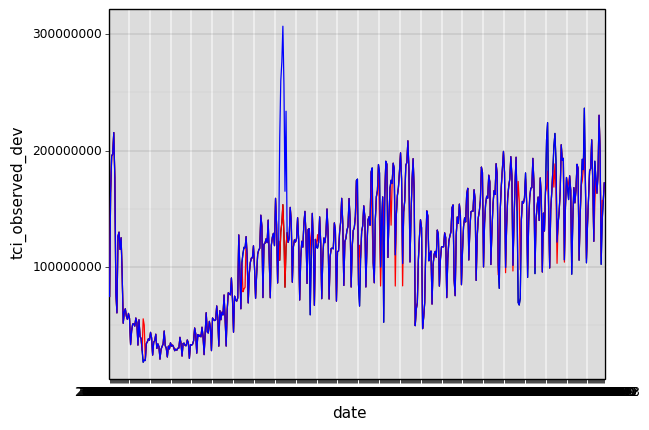

<ggplot: (8770968409633)>

In [52]:
import plotnine as p9
gg = (p9.ggplot(df_daily_update[df_daily_update.region_slug == 'mexicocity'],
                    p9.aes(x = 'date', y='tci_observed_dev', group = 'region_slug')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes(y = 'tci_smoothed_dev'), color = 'red')
 + p9.geom_line(p9.aes(y = 'tci_observed'), color = 'blue')
     )
gg

#### Long format

In [46]:
df_daily_update.head(1)

,date,region_slug,tci_observed,tcp_observed,tci_smoothed,tcp_smoothed,tci_observed_dev,tcp_observed_dev,tcp_smoothed_dev,tci_smoothed_dev
0,2020-07-15,aguascalientes,2544527,-10.189667,2544527.0,-10.189667,2544527,-10.189667,-10.189667,2544527.0


In [53]:
from siuba import *
df_update_long = (df_daily_update 
 >> gather('measure', 'value', _["tci_observed":"tci_smoothed_dev"])
)
df_update_long['type'] = 'TCP'
tci_exist = df_update_long['measure'].isin(['tci_observed',  'tci_smoothed', 
                                           'tci_observed_dev', 'tci_smoothed_dev'])
df_update_long['type'][tci_exist] = 'TCI'
#df_update_long.measure.unique()

/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [54]:
df_prev_long = pd.read_csv(f"/home/soniame/private/smooth/daily_daily_index_long-202105.csv", index_col=0)
df_prev_long = df_prev_long[df_prev_long.measure.isin(['tci_observed',  'tcp_observed', 'tci_cleaned', 'tcp_cleaned']) == False]

print(df_prev_long.measure.unique())

df_daily_long = pd.concat([df_prev_long, df_update_long])
print(df_daily_long.measure.unique())
#df_daily_long[(df_daily_long.measure == 'tci_observed') & 
#              (df_daily_long.date == '2020-05-29') &
#              (df_daily_long.region_slug == 'aguascalientes')]

['tci_cleaned_ls_4X' 'tci_cleaned_ls_20X' 'tci_cleaned_ls_10X'
 'tci_cleaned_ls_15X' 'tci_cleaned_ls_OFF' 'tci_cleaned_ls_MIX'
 'tcp_cleaned_ls_4X' 'tcp_cleaned_ls_20X' 'tcp_cleaned_ls_OFF'
 'tcp_cleaned_ls_MIX' 'pc_driven_miles__waze' 'workplace__goo']
['tci_cleaned_ls_4X' 'tci_cleaned_ls_20X' 'tci_cleaned_ls_10X'
 'tci_cleaned_ls_15X' 'tci_cleaned_ls_OFF' 'tci_cleaned_ls_MIX'
 'tcp_cleaned_ls_4X' 'tcp_cleaned_ls_20X' 'tcp_cleaned_ls_OFF'
 'tcp_cleaned_ls_MIX' 'pc_driven_miles__waze' 'workplace__goo'
 'tci_observed' 'tcp_observed' 'tci_smoothed' 'tcp_smoothed'
 'tci_observed_dev' 'tcp_observed_dev' 'tcp_smoothed_dev'
 'tci_smoothed_dev']


In [75]:
# saving the update
df_daily_long.to_csv(f"/home/soniame/private/smooth/daily_daily_index_long-{cm}.csv")
df_daily_long.to_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/dashboard/daily_daily_index_long-{cm}.csv")


/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 12 rows containing missing values.


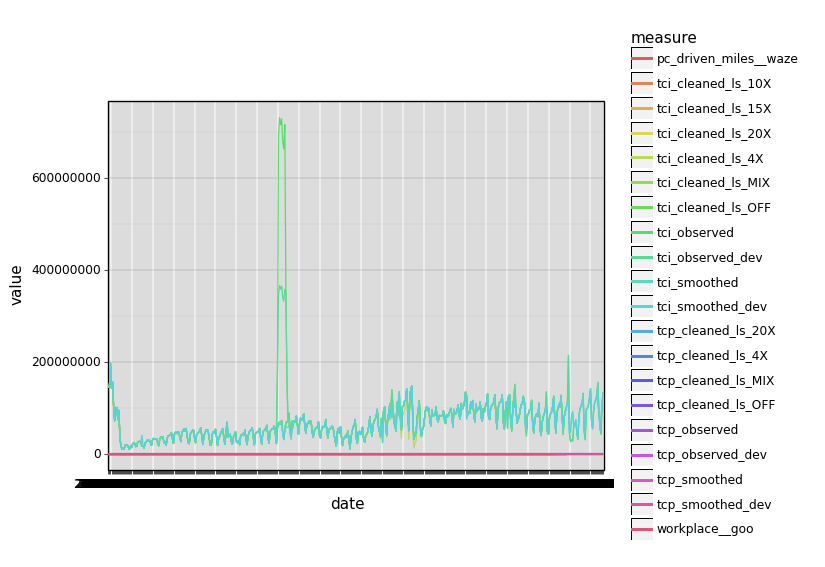

<ggplot: (8770969385357)>

In [57]:
gg = (p9.ggplot(df_daily_long[df_daily_long.region_slug == 'country_argentina'],
                    p9.aes(x = 'date', y='value', 
                           colour = 'measure', group = 'measure')) 
+ p9.geom_line() )
gg

In [ ]:
#df_daily_long.head()
#(df_daily_long 
#>> group_by('measure', 'type')
#>> summarize(date_min = _.date.min(),
#             date_max = _.date.max(), 
#             n_obs = _.date.count())
#)

In [58]:
gg = (p9.ggplot(df_daily_long[(df_daily_long.region_slug == 'country_peru') & 
                              (df_daily_long.type == 'TCI') & 
                              (df_daily_long.date > '2020-08-01') &
                              (df_daily_long.measure.isin(['tci_observed_dev', 'tci_smoothed_dev']))],
                    p9.aes(x = 'date', y='value', 
                           colour = 'measure', group = 'measure')) 
 + p9.geom_line()
 + p9.facet_wrap('region_slug')
 + p9.theme(axis_text_x=p9.element_text(angle=90),
                figure_size=(10, 5) )
)
#gg

In [ ]:
#df_daily_update.sort_values('date').date.unique()

#### Daily dev

In [ ]:
#from src import utils
#conn = utils.connect_athena(path='../configs/athena.yaml')
#qry="""
#select 
#    region_slug, 
#    date(concat(cast(year as varchar), '-', 
#				cast(month as varchar), '-', 
#				cast(day as varchar))) as date,
#    observed as tci_dev, tcp as tcp_dev
#from spd_sdv_waze_corona.dev_daily_daily_index
#where region_type in ('country', 'city');
#"""
#df_daily_dev = pd.read_sql_query(qry, conn)

In [ ]:
#df_daily_dev_long = (df_daily_dev 
#    >> gather('measure', 'value', _["tci_dev":"tcp_dev"]))
#print(df_daily_dev_long.shape)
#regions_in = list(set(df_daily_dev_long.region_slug.unique()) & set(df_daily_long.region_slug.unique()))
#df_daily_dev_long = df_daily_dev_long[df_daily_dev_long.region_slug.isin(regions_in)]
#df_daily_dev_long.shape
#df_daily_dev_long['type'] = 'TCP'
#tci_exist = df_daily_dev_long['measure'].isin(['tci_dev'])
#df_daily_dev_long['type'][tci_exist] = 'TCI'

In [ ]:
#df_daily_long = pd.read_csv("/home/soniame/private/daily_daily_index_long.csv", index_col=0)
#df_daily_long.shape
#df_daily_long_new = pd.concat([df_daily_long, df_daily_dev_long], axis=0)
#df_daily_long_new.to_csv("/home/soniame/private/daily_daily_index_long-dev.csv")

### Weekly

#### Experiments of parameters

In [ ]:
df_list = list()
for k in range(7):
    file = ['ls1', 'ls4', 'ls10', 'ls15', 'ls20', 'ls100', 'lsmix'][k]
    print(file)
    metric = ['', '_ls_4X', '_ls_10X', '_ls_15X', '_ls_20X', '_ls_OFF', '_ls_MIX'][k]
    
    df = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/weekly/weekly_weekly_index_max_{file}.csv")
    df = df[['week', 'days_num', 'date_min', 'region_slug', 
             'tci_observed', 'tcp_observed', 'tci_clean', 'tcp_clean']] \
        .rename(columns = {'tci_clean':f'tci_cleaned{metric}', 
                           'tcp_clean':f'tcp_cleaned{metric}'}) 
    print(df.shape)
    df_list.append(df)
    
from functools import reduce
df_union = reduce(lambda x, y: pd.merge(x, y, on = ['week', 'days_num', 'region_slug', 'date_min', 'tci_observed', 'tcp_observed']), df_list)
print(df_union.shape)
df_union.head(2)    

##### Long format experiments

In [ ]:
df_weekly = pd.read_csv("/home/soniame/private/weekly_weekly_index.csv")
df_weekly.head(2)

In [ ]:
df_weekly_long = (df_weekly 
 >> select('week', 'days_num', 'date_min', 'region_slug', 
           'tci_observed',  'tci_cleaned', 
           'tci_cleaned_ls_4X', 'tci_cleaned_ls_20X',
           'tci_cleaned_ls_10X', 'tci_cleaned_ls_15X',
           'tci_cleaned_ls_OFF', 'tci_cleaned_ls_MIX',
           'tcp_observed', 'tcp_cleaned', 
           'tcp_cleaned_ls_4X', 'tcp_cleaned_ls_20X', 
           'tci_cleaned_ls_10X', 'tci_cleaned_ls_15X',
           'tcp_cleaned_ls_OFF', 'tcp_cleaned_ls_MIX')
 >> gather('measure', 'value', _["tci_observed":"tcp_cleaned_ls_MIX"])
 >> mutate(type = 'TCP')
)
tci_exist = df_weekly_long['measure'].isin(['tci_observed',  'tci_cleaned', 
           'tci_cleaned_ls_4X', 'tci_cleaned_ls_20X', 
           'tci_cleaned_ls_10X', 'tci_cleaned_ls_15X',
           'tci_cleaned_ls_OFF', 'tci_cleaned_ls_MIX'])
df_weekly_long['type'][tci_exist] = 'TCI'

print(df_weekly_long.type.unique())
print(df_weekly_long.measure.unique())
head(df_weekly_long)

In [ ]:
#df_weekly_long.to_csv("/home/soniame/private/weekly_weekly_index_long-202105.csv")

#### Export to csv

In [ ]:
df_union.describe()

In [ ]:
print(df_union.week.max())
print(df_union.date_min.max())
df_union.head()

In [ ]:
df_union.to_csv("/home/soniame/private/weekly_weekly_index.csv", index=False)

In [ ]:
gg = (p9.ggplot(df_union[df_union.region_slug == 'kingston'],
                    p9.aes(x = 'week', y='tci_observed', group = 'region_slug')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tci_cleaned'), color = 'blue'))
#gg

#### Athena historic

In [ ]:
update_historic = False

In [ ]:
df_union_weekly = pd.read_csv("/home/soniame/private/smooth/weekly_weekly_index-202105.csv", index_col=0) \
    [['date_min', 'region_slug', 
      'tci_observed', 'tcp_observed', 
      'tci_cleaned_ls_20X', 'tcp_cleaned_ls_20X']] \
    .rename(columns = {'tci_cleaned_ls_20X':'tci_smoothed', 
                       'tcp_cleaned_ls_20X':'tcp_smoothed'}) 
#df_union_weekly.head(2)

import boto3
import awswrangler as wr
from src import utils
conn = utils.connect_athena(path='../configs/athena.yaml')

s3_path = "s3://iadbprod-public-stata-as-a-service/spd-sdv-omitnik-waze/corona"
if update_historic:
    res = wr.s3.to_parquet(
            df=df_union_weekly,
            path=f"{s3_path}/athena/prod/smooth/prod_daily_weekly_smooth_historical",
            dataset=True,
            database='spd_sdv_waze_corona',
            table='prod_daily_weekly_smooth_historical',
            mode="overwrite",
            boto3_session=boto3.Session(region_name="us-east-1"),
        )

#### Export update

In [60]:
# preview observation
df_prev = pd.read_sql_query(f"""
    select 
        date_min, region_slug, tci_observed, tcp_observed,  tci_smoothed, tcp_smoothed
    from spd_sdv_waze_corona.prod_daily_weekly_smooth_historical""", conn)

In [61]:
# update dates from prod
df_new = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/weekly/weekly_weekly_index_prod_max_ls20-202106291106.csv")
df_new = df_new[df_new.date_min > df_prev.date_min.max()][['date_min', 'region_slug', 
                                        'tci_observed', 'tcp_observed', 
                                        'tci_clean', 'tcp_clean']] \
        .rename(columns = {'tci_clean':'tci_smoothed', 
                           'tcp_clean':'tcp_smoothed'})
df_weekly_prod = pd.concat([df_prev, df_new])
df_weekly_prod.head()

,date_min,region_slug,tci_observed,tcp_observed,tci_smoothed,tcp_smoothed
0,2020-03-09,aguascalientes,18414201,-0.072327,18414201.0,-0.072327
1,2020-03-16,aguascalientes,9578544,-48.020464,9578544.0,-48.020464
2,2020-03-23,aguascalientes,5471700,-70.306925,5471700.0,-70.306925
3,2020-03-30,aguascalientes,4701122,-74.488593,4701122.0,-74.488593
4,2020-04-06,aguascalientes,3838557,-79.169443,3838557.0,-79.169443


In [62]:
# update dates from dev
df_dev = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/weekly/weekly_weekly_index_dev_max_ls20-202107051807.csv")
df_dev = df_dev[['date_min', 'region_slug', 
                'tci_observed', 'tcp_observed', 
                'tcp_clean', 'tci_clean']]  \
        .rename(columns = {'tci_clean':'tci_smoothed_dev', 
                           'tcp_clean':'tcp_smoothed_dev',
                           'tci_observed':'tci_observed_dev', 
                           'tcp_observed':'tcp_observed_dev'})
#df_dev.head()

In [63]:
print(df_weekly_prod.shape)
print(df_dev.shape)

df_weekly_update = df_weekly_prod.merge(df_dev)
#df_daily_update = df_daily_prod

(5503, 6)
(5493, 6)


In [64]:
df_weekly_update.to_csv(f"/home/soniame/private/smooth/weekly_index_index_update-{cm}.csv", index=False)
print(df_weekly_update.date_min.max())
print(df_prev.date_min.max())
print(df_new.date_min.min())
print(df_new.date_min.max())
print(df_dev.date_min.min())
print(df_dev.date_min.max())

2021-06-21
2021-05-17
2021-05-24
2021-06-21
2020-03-09
2021-06-28


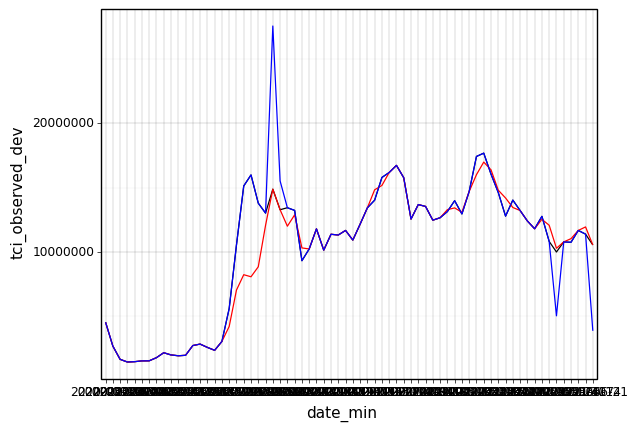

<ggplot: (8770961087429)>

In [67]:
import plotnine as p9
gg = (p9.ggplot(df_weekly_update[df_weekly_update.region_slug == 'torreon'],
                    p9.aes(x = 'date_min', y='tci_observed_dev', group = 'region_slug')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes(y = 'tci_smoothed_dev'), color = 'red')
 + p9.geom_line(p9.aes(y = 'tci_observed'), color = 'blue')
     )
gg

#### Long format 

In [68]:
df_weekly_update.head(1)

,date_min,region_slug,tci_observed,tcp_observed,tci_smoothed,tcp_smoothed,tci_observed_dev,tcp_observed_dev,tcp_smoothed_dev,tci_smoothed_dev
0,2020-03-09,aguascalientes,18414201,-0.072327,18414201.0,-0.072327,18414201,-3.5533,-3.5533,18414201.0


In [69]:
from siuba import *
df_update_long = (df_weekly_update 
 >> gather('measure', 'value', _["tci_observed":"tci_smoothed_dev"])
)

df_update_long
df_update_long['type'] = 'TCP'
tci_exist = df_update_long['measure'].isin(['tci_observed',  'tci_smoothed',
                                           'tci_observed_dev',  'tci_smoothed_dev'])
df_update_long['type'][tci_exist] = 'TCI'

/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [70]:
#df_update_long.head()
df_prev_long = pd.read_csv(f"/home/soniame/private/smooth/weekly_weekly_index_long-202105.csv", index_col=0)
df_prev_long = df_prev_long[df_prev_long.measure.isin(['tci_observed',  'tcp_observed', 'tci_cleaned', 'tcp_cleaned']) == False]
print(df_prev_long.measure.unique())

df_weekly_long = pd.concat([df_prev_long, df_update_long])
df_weekly_long.measure.unique()

['tci_cleaned_ls_4X' 'tci_cleaned_ls_20X' 'tci_cleaned_ls_10X'
 'tci_cleaned_ls_15X' 'tci_cleaned_ls_OFF' 'tci_cleaned_ls_MIX'
 'tcp_cleaned_ls_4X' 'tcp_cleaned_ls_20X' 'tcp_cleaned_ls_OFF'
 'tcp_cleaned_ls_MIX']


array(['tci_cleaned_ls_4X', 'tci_cleaned_ls_20X', 'tci_cleaned_ls_10X',
       'tci_cleaned_ls_15X', 'tci_cleaned_ls_OFF', 'tci_cleaned_ls_MIX',
       'tcp_cleaned_ls_4X', 'tcp_cleaned_ls_20X', 'tcp_cleaned_ls_OFF',
       'tcp_cleaned_ls_MIX', 'tci_observed', 'tcp_observed',
       'tci_smoothed', 'tcp_smoothed', 'tci_observed_dev',
       'tcp_observed_dev', 'tcp_smoothed_dev', 'tci_smoothed_dev'],
      dtype=object)

In [74]:
df_weekly_long.to_csv(f"/home/soniame/private/smooth/weekly_weekly_index_long-{cm}.csv")
df_weekly_long.to_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/dashboard/weekly_weekly_index_long-{cm}.csv")

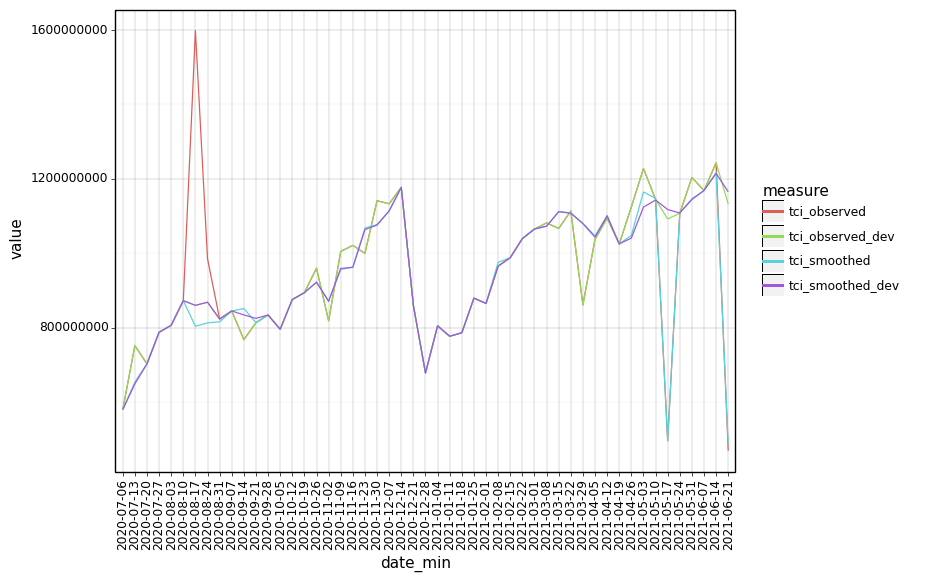

<ggplot: (8770968521521)>

In [72]:
gg = (p9.ggplot(df_weekly_long[(df_weekly_long.region_slug == 'mexicocity') & 
                              (df_weekly_long.type == 'TCI') & 
                              (df_weekly_long.date_min > '2020-07-01') &
                              (df_weekly_long.measure.isin(['tci_observed', 'tci_smoothed',
                                                           'tci_observed_dev', 'tci_smoothed_dev']))],
                    p9.aes(x = 'date_min', y='value', 
                           colour = 'measure', group = 'measure')) 
 + p9.geom_line()
 + p9.theme(axis_text_x=p9.element_text(angle=90),
                figure_size=(8, 6) )
)
gg

#### Weekly dev

In [ ]:
from src import utils
conn = utils.connect_athena(path='../configs/athena.yaml')